In [ ]:
import numpy as np  # numpy package is for fast numerical computation in Python
import spacy
from sklearn.datasets import fetch_20newsgroups  # import \\n    packages which help us download dataset and load intp python
from sklearn.pipeline import Pipeline

#Data
Load the filenames and data from the 20 newsgroups dataset

This will download the datasets if you don't have them already

In [ ]:
twenty_train = fetch_20newsgroups(
    subset="train", shuffle=True, download_if_missing=True
)
twenty_test = fetch_20newsgroups(subset="test", shuffle=True, download_if_missing=True)

##Check Data

In [ ]:
twenty_train.data[:2]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

###Check target_names

In [ ]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#Convert text to numbers
CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print(f"Shape of Term Frequency Matrix: {X_train_counts.shape}")

Shape of Term Frequency Matrix: (11314, 130107)


##Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(f"Shape of TFIDF Matrix: {X_train_tfidf.shape}")

Shape of TFIDF Matrix: (11314, 130107)


#Model 1:
Naive Bayes (NB) classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

##Pipeline

In [ ]:
text_nb_clf = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", MultinomialNB()),
    ]
)
text_nb_clf = text_nb_clf.fit(twenty_train.data, twenty_train.target)

###Predict amd Accuracy

In [ ]:
predicted = text_nb_clf.predict(twenty_test.data)


In [ ]:
naivebayes_clf_accuracy = np.mean(predicted == twenty_test.target) * 100.0
print(f"Test Accuracy is {naivebayes_clf_accuracy} %")

Test Accuracy is 77.38980350504514 %


#Model 2:
Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression as LR


text_lr_clf = Pipeline(
    [("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf", LR())]
)
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)

##Predict and Accuracy

In [ ]:
lr_predicted = text_lr_clf.predict(twenty_test.data)
lr_clf_accuracy = np.mean(lr_predicted == twenty_test.target) * 100.0
print(f"Test Accuracy is {lr_clf_accuracy}")

Test Accuracy is 82.74030801911843


#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_true=twenty_test.target, y_pred=lr_predicted)

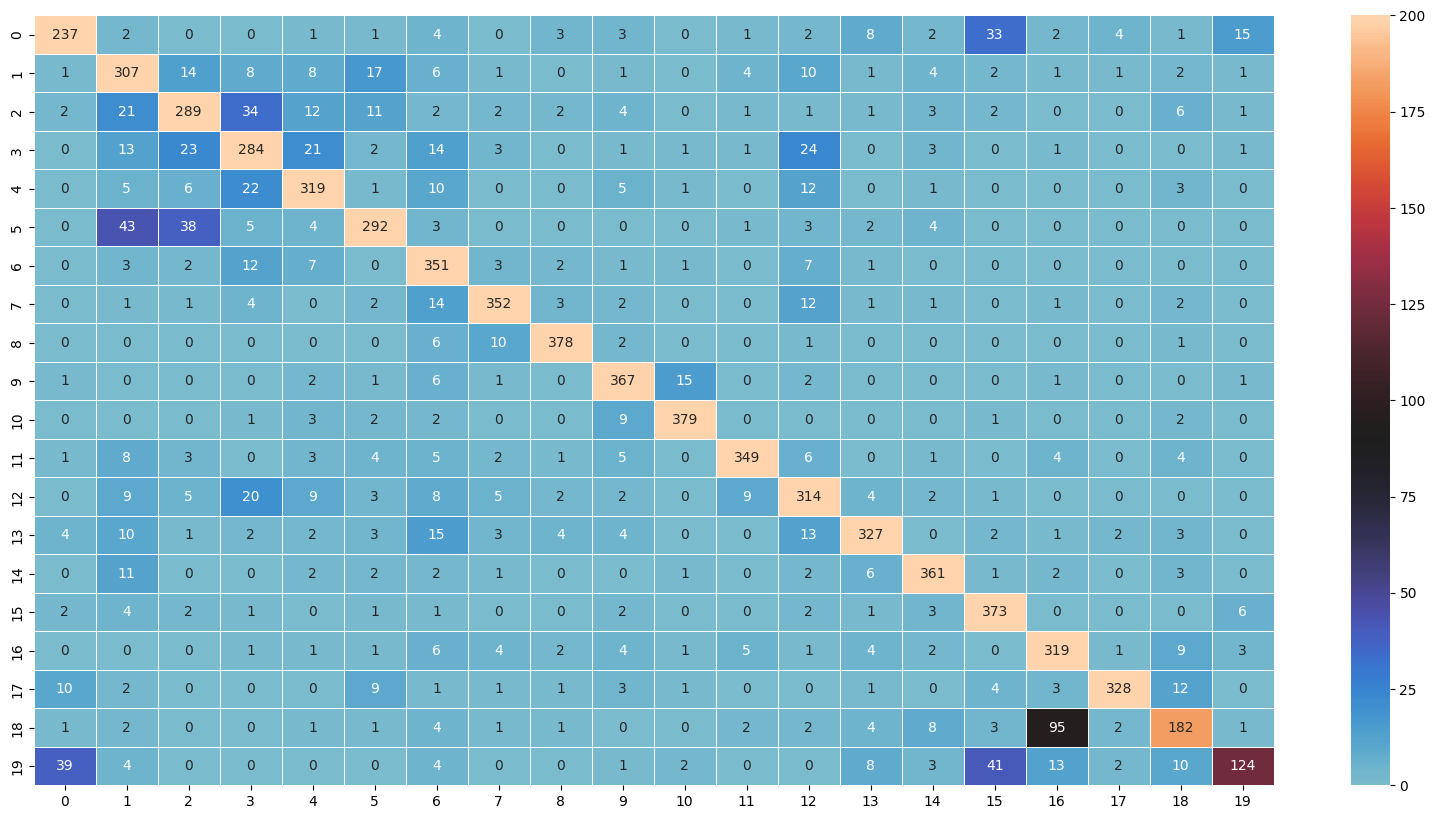

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(20, 10))
ax = sns.heatmap(cf, annot=True, fmt="d", linewidths=0.5, center=90, vmax=200)

#Removing Stopwords

In [ ]:
nlp = spacy.load("en_core_web_sm")
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
doc = nlp("I am learning the most important ideas Natural Language Processing ideas using Python")
print(doc)  # doc is a spaCy object which stores the entire document string

I am learning the most important ideas Natural Language Processing ideas using Python


##Tokens

In [ ]:
for token in doc:
    print(token)

I
am
learning
the
most
important
ideas
Natural
Language
Processing
ideas
using
Python


##Simplified Tokens

In [ ]:
simplified_doc = [token for token in doc if not token.is_punct | token.is_stop]
simplified_doc
# please note that .orth_ attribute returns the unicode string representation of the token

[learning, important, ideas, Natural, Language, Processing, ideas, Python]

##POS Tokens

In [ ]:
for token in simplified_doc:
    print(f'Token:{token.orth_}\tLemmatized:{token.lemma_}\tPart-of-Speech-Tag:{token.pos_}')

Token:learning	Lemmatized:learn	Part-of-Speech-Tag:VERB
Token:important	Lemmatized:important	Part-of-Speech-Tag:ADJ
Token:ideas	Lemmatized:idea	Part-of-Speech-Tag:NOUN
Token:Natural	Lemmatized:Natural	Part-of-Speech-Tag:PROPN
Token:Language	Lemmatized:Language	Part-of-Speech-Tag:PROPN
Token:Processing	Lemmatized:Processing	Part-of-Speech-Tag:PROPN
Token:ideas	Lemmatized:idea	Part-of-Speech-Tag:NOUN
Token:Python	Lemmatized:Python	Part-of-Speech-Tag:PROPN


#Our Pipeline with Removing Stopwords

In [ ]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)

def spacy_tokenizer(document):
    return [token.orth_ for token in tokenizer(document)]

In [ ]:
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)

In [ ]:
def calc_print_accuracy(text_clf, test):
    predictions = text_clf.predict(test.data)
    clf_accuracy = np.mean(predictions == test.target) * 100.
    print(f'Test Accuracy is {clf_accuracy}')
    return clf_accuracy

calc_print_accuracy(text_lr_clf, twenty_test)

Test Accuracy is 82.74030801911843


82.74030801911843

##Apply Stopwords Tokenizer to Pipeline

In [ ]:
text_lr_clf = Pipeline([('vect', CountVectorizer(tokenizer=spacy_tokenizer, stop_words=list(STOP_WORDS))), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)
calc_print_accuracy(text_lr_clf, twenty_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy is 79.5539033457249


79.5539033457249